# Intelligence artificielle

Groupe 5: Catarina Silva Roriz, Yusong Zhang, Valentin Malhas, Antoine Tarte

In [1]:
import utils as utl
import pipeline as pl

import time
import datetime
import numpy as np
import pandas as pd

## Introduction

Nous sommes amenés à analyser les données d'une entreprise pharmaceutique indienne appelée "HumanForYou" afin de comprendre les facteurs qui influencent le taux de rotation des employés de l'entreprise. Notre objectif est de proposer des pistes d'amélioration pour encourager les employés à rester dans l'entreprise. Nous devons utiliser des méthodes d'analyse de données pour identifier les facteurs qui ont le plus d'impact sur le taux de rotation des employés et proposer des modèles pour améliorer la rétention des employés.

## Ethique

### 1 - Respect de l'autonomie humaine :

Les variables telles que l'âge, le sexe, le niveau d'études, le statut marital, la distance entre le domicile et le lieu de travail, ainsi que le niveau d'investissement en actions de l'entreprise par le salarié, peuvent être utilisées pour étudier les inégalités salariales et les opportunités de carrière dans l'entreprise. Il s'agit donc de données sensibles qui doivent être traitées avec la plus grande prudence et dans le respect de l'éthique.

En revanche, les variables telles que l'attrition, le salaire brut mensuel, le nombre d'années d'expérience en entreprise, le nombre de jours de formation en 2015, le nombre d'entreprises pour lesquelles le salarié a travaillé avant de rejoindre l'entreprise et le nombre d'années depuis la dernière augmentation individuelle peuvent être utilisées pour étudier la satisfaction et la rétention des employés.

Les variables telles que le statut marital, le métier et la fréquence des déplacements professionnels peuvent être utilisées pour étudier les effets de la vie personnelle et professionnelle sur les performances au travail.

La collecte de données sur les employés doit toujours respecter les normes éthiques et légales en matière de protection des données personnelles et de respect de la vie privée. Les entreprises doivent s'assurer que les données sont collectées de manière légale et éthique, et que les employés sont informés de la collecte et de l'utilisation de leurs données. Elles ne doivent pas être utilisées de manière abusive ou discriminatoire, et les employés doivent avoir la possibilité de contrôler leurs données personnelles.

Il est également important de préciser que cet outil est développé dans un but d'aide à l'analyse des problèmes de cette entreprise, mais en aucun cas celui-ci n'a été prévu pour prendre des décisions à la place d'un responsable. 

### 2 - Robustesse technique et la sécurité

Pour que les informations de l’entreprise soient robustes techniquement et sécurisées, il est nécessaire que les données soient stockées dans un endroit sûr et accessible uniquement aux personnes autorisées, et qu'elles soient traitées conformément aux réglementations de confidentialité des données et de protection de la vie privée.

Les données sont stockées uniquement au format CSV, ce qui n'est pas considéré comme une méthode très sécurisée. De plus, nous avons identifié la présence de données personnelles dans ces fichiers, alors que l'entreprise nous avait certifié les avoir retirées.

Pour respecter au mieux la sécurité des données traitées par notre IA, nous allons simplement chercher à retirer les données sensibles. Nous ne pourrons évidemment pas toutes les retirer, mais cela limitera tout de même la circulation de données sensibles. Nous pouvons également faire en sorte que notre IA ne garde aucune information en mémoire pour limiter le risque de fuite.

### 3 - Confidentialité et gouvernance des données

Dans nos discussions, nous pensons que le niveau d'études, le salaire brut mensuel, le nombre d'années d'expérience en entreprise, le nombre de jours de formation en 2015 et le niveau d'investissement en actions de l’entreprise, etc. ne sont pas des informations sensibles pour chaque individu, car, par exemple, le salaire est fourni par l'entreprise et celle-ci ne peut pas l'ignorer et a le droit de le connaître. Les autres facteurs mentionnés sont également directement liés à l'entreprise et ne sont donc pas considérés comme des données sensibles.

Le statut marital et la « distance from home » ont été ajoutés à la section des données sensibles parce que, par exemple, la distance entre le domicile et l'entreprise est une information personnelle pour chaque individu et parce qu'il est possible de travailler en ligne même si la distance est longue. L’entreprise n'a pas besoin de connaître la résidence exacte de l'employé. L'état civil peut même être à l'origine d'un traitement inéquitable. Comme ces données peuvent être considérées comme sensibles, nous avons décidé de les retirer de notre jeu de données pour éviter tous problèmes éventuels.

En ce qui concerne les données relatives à l'âge et au sexe, ce sont toutes deux des données sensibles. Il faudra donc traiter ces données avec la plus grande des précautions, ou bien tout simplement les retirer de notre jeu de données lors de leur traitement par l’IA. Dans notre situation, nous allons opter pour la deuxième option et retirer ces données.

En termes de protection, les données ont été anonymisées : un employé de l'entreprise sera représenté par le même EmployeeID dans l'ensemble des fichiers qui suivent. L'anonymisation des données consiste à supprimer toute information qui permettrait d'identifier une personne. Cependant, il est important de noter que l'anonymisation n'est pas toujours suffisante pour garantir la confidentialité des données. Il est également important de mettre en place des mesures de sécurité appropriées pour protéger les données contre les menaces externes et internes, ainsi que de se conformer aux lois et réglementations applicables en matière de protection des données. En revanche, les données sensibles devraient être stockées de manière sécurisée et protégées contre l'accès non autorisé, la modification ou la destruction. Des mesures telles que la cryptographie, la gestion des accès et des autorisations, la surveillance des activités et la formation des employés peuvent aider à assurer la sécurité des données.

### 4 - La transparence

Dans le cadre de l'étude spécifique sur l'attrition des employés, les données fournies sont transparentes car elles permettent de comprendre les critères qui ont été utilisés pour sélectionner les variables étudiées. Les variables choisies pour l'étude de l'attrition sont également clairement définies et les données sont suffisamment détaillées pour permettre une analyse approfondie.

Il est essentiel d'informer les employés de l'utilisation de l'IA dans le traitement de leurs données. Ils devraient être informés de la finalité de l'utilisation de l'IA, des types de données utilisées et de la manière dont ces données seront traitées. Ils devraient également être informés des mesures prises pour garantir la confidentialité et la sécurité de leurs données personnelles.

Il est important de garantir que les employés donnent leur consentement libre et éclairé pour l'utilisation de leurs données personnelles dans le cadre de l'IA. Ils devraient avoir la possibilité de retirer leur consentement à tout moment et de demander l'accès à leurs données personnelles traitées par l'IA.

### 5 - Diversité, non-discrimination et équité

Les données peuvent potentiellement refléter des biais et des inégalités, même si elles sont anonymisées. Les variables telles que le sexe, l'âge, le statut marital, et la distance from home peuvent toutes potentiellement influencer les décisions de recrutement et de promotion au sein de l'entreprise, et peuvent être associées à des biais inconscients.

Ces données peuvent donc provoquer plusieurs problèmes dont : 

* Biais de sélection : Si une entreprise utilise ces caractéristiques pour prendre des décisions d'embauche ou de promotion, cela peut conduire à une sélection injuste de certains groupes. Par exemple, si une entreprise favorise les candidats vivant à proximité de l'entreprise, cela pourrait discriminer les candidats vivants plus loin et qui ont peut-être des obligations familiales qui les empêchent de se rapprocher. De même pour la variable sexe, il se pourrait que l’entreprise détermine qu’il vaut mieux valoriser un genre plus qu’un autre.

* Biais de prédiction : Si ces caractéristiques sont utilisées dans des modèles d'IA pour prédire des résultats, telles que la performance au travail ou le risque de licenciement, cela peut conduire à des biais de prédiction. Par exemple, si une entreprise utilise l'âge comme une variable prédictive, cela pourrait conduire à une discrimination envers les travailleurs plus âgés, même s'ils sont performants.

* Biais de traitement : Si ces caractéristiques sont utilisées pour prendre des décisions concernant les avantages, les promotions ou les augmentations de salaire, cela peut conduire à une discrimination directe. Par exemple, si une entreprise accorde des avantages spécifiques aux travailleurs mariés, cela pourrait discriminer les travailleurs célibataires ou divorcés.

* Biais systémique : Si ces caractéristiques sont utilisées de manière systématique dans les décisions d'entreprise, cela peut conduire à des effets cumulatifs de discrimination. Par exemple, si une entreprise favorise les travailleurs masculins vivant à proximité de l'entreprise, cela peut créer un environnement de travail discriminatoire pour les travailleuses, les travailleurs vivants plus loin et les travailleurs mariés.

Pour s'assurer que les données respectent la diversité, la non-discrimination et l'équité, il est important de procéder à une analyse rigoureuse des données afin d'identifier les potentiels biais et inégalités. Ensuite, il faudrait prendre des mesures pour les corriger et les éviter à l'avenir. Cela peut inclure des formations pour sensibiliser les employés à la diversité et l'inclusion, des politiques de recrutement et de promotion basées sur des critères objectifs et des objectifs de diversité clairs, et des mécanismes de surveillance pour assurer que ces politiques sont respectées. Dans notre situation, nous avons identifié des données qui pourraient être discriminatoires pour les employés. Pour éviter tout biais de la part de notre IA, nous allons les retirer et mettre en place des mesures pour assurer la diversité, l'inclusion et l'équité dans notre traitement des données.

### 6 - Bien-être environnemental et sociétal

Les données fournies ne permettent pas de déterminer avec certitude si l'entreprise respecte le bien-être environnemental et sociétal. En effet, les données sont principalement centrées sur les caractéristiques des employés et ne fournissent que des informations limitées sur les pratiques environnementales et sociétales de l'entreprise.

Cependant, certaines informations indirectes peuvent être extraites des données pour évaluer si l'entreprise prend en compte le bien-être environnemental et sociétal. Par exemple, le niveau d'investissement en actions de l'entreprise par les employés peut donner une indication de l'engagement de l'entreprise en matière de développement durable.

Cependant, ces informations indirectes ne fournissent qu'une indication limitée de la performance environnementale et sociétale de l'entreprise. Pour une évaluation complète, il est nécessaire de disposer de données plus spécifiques sur les pratiques et politiques de l'entreprise en matière de développement durable.

Il est également de notre rôle de nous demander si cette étude peut réellement contribuer au bien-être des employés et non pas seulement aux bénéfices de l'entreprise.

### 7 - La responsabilité

L’anonymisation des données peut être considérée comme un moyen de protéger la vie privée des individus et de respecter leur autonomie. Si les données ont été correctement anonymisées, il devrait être impossible d'identifier les individus auxquels les données se réfèrent. Cela signifie que les employés concernés ne peuvent pas être personnellement identifiables à partir des données disponibles, ce qui réduit les risques pour leur vie privée.

Cependant, il est important de souligner que l'anonymisation ne garantit pas une protection totale de la vie privée. Il est toujours possible qu'une personne ou une entité puisse recouper ces données avec d'autres sources d'informations pour tenter d'identifier les individus auxquels elles se réfèrent. Par conséquent, il est important de veiller à ce que les processus d'anonymisation soient rigoureux et bien conçus, en utilisant des techniques telles que la suppression des données d'identification et l'agrégation des données pour minimiser le risque de ré-identification.

Si les données ont été correctement anonymisées, elles devraient respecter la responsabilité et l'autonomie humaine. Cependant, il est toujours important de traiter les données avec soin et de prendre des mesures pour protéger la vie privée des individus concernés, même lorsqu'ils sont anonymes.

Il faut également se poser les bonnes questions et analyser les résultats de manière rigoureuse pour comprendre si les départ des employés et de la faute de l’entreprise ou seulement de leur volonté.

Si les données ont été correctement anonymisées, elles devraient respecter la responsabilité et l'autonomie humaine. Cependant, il est toujours important de traiter les données avec soin et de prendre des mesures pour protéger la vie privée des individus concernés, même lorsqu'ils sont anonymes.

### Conclusion

Pour conclure, nous sommes tiraillés entre le respect des normes éthiques et la nécessité de fournir des résultats performants. Cependant, l'utilisation de paramètres allant à l'encontre de l'éthique ne peut pas résoudre les problèmes de discrimination au sein de l'entreprise. Afin de respecter au mieux l'éthique de l'utilisation d'une telle IA, il est nécessaire de contacter chaque employé et de leur demander leur accord pour fournir les informations en question. Il sera également nécessaire de renforcer la sécurité des données et de leur communiquer la manière dont ces dernières sont stockées. Si les employés n'y voient aucun inconvénient, alors les données utilisées respecteront les normes éthiques.

Afin de respecter tous les points présentés ci-dessus et de garantir l'anonymisation et la confidentialité des données, après consultation avec tout le groupe, nous avons décidé de retirer les colonnes suivantes :
* Le sexe
* L'âge
* Le statut marital
* La distance maison/travail

Nous sommes conscients que la suppression de ces données peut entraîner une perte significative de précision de notre algorithme. Toutefois, nous préférons cette solution à l'utilisation de données personnelles pouvant porter préjudice aux employés.

## Analyse des données

Nous allons maintenant analyser les données qui nous ont été fournies afin de déterminer quelles données seront utilisées lors de l'exécution de notre modèle. Pour ce faire, nous allons examiner chaque donnée individuellement à l'aide d'histogrammes. Nous ne montrerons pas les données relatives aux heures d'entrée et de sortie des employés car il ne serait pas intéressant d'en faire des histogrammes.

Les données d'entrée et de sortie seront tout de même exploitées par notre modèle. Cependant, nous les traiterons de la manière suivante : nous ferons la moyenne des heures passées par jour par l'employé dans l'entreprise.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>],
       [<Axes: title={'center': 'YearsAtCompany'}>,
        <Axes: title={'center': 'YearsSinceLastPromotion'}>,
        <Axes: title={'center': 'YearsWithCurrManager'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'WorkLifeBalance'}>,
        <Axes: title={'center': 'JobIn

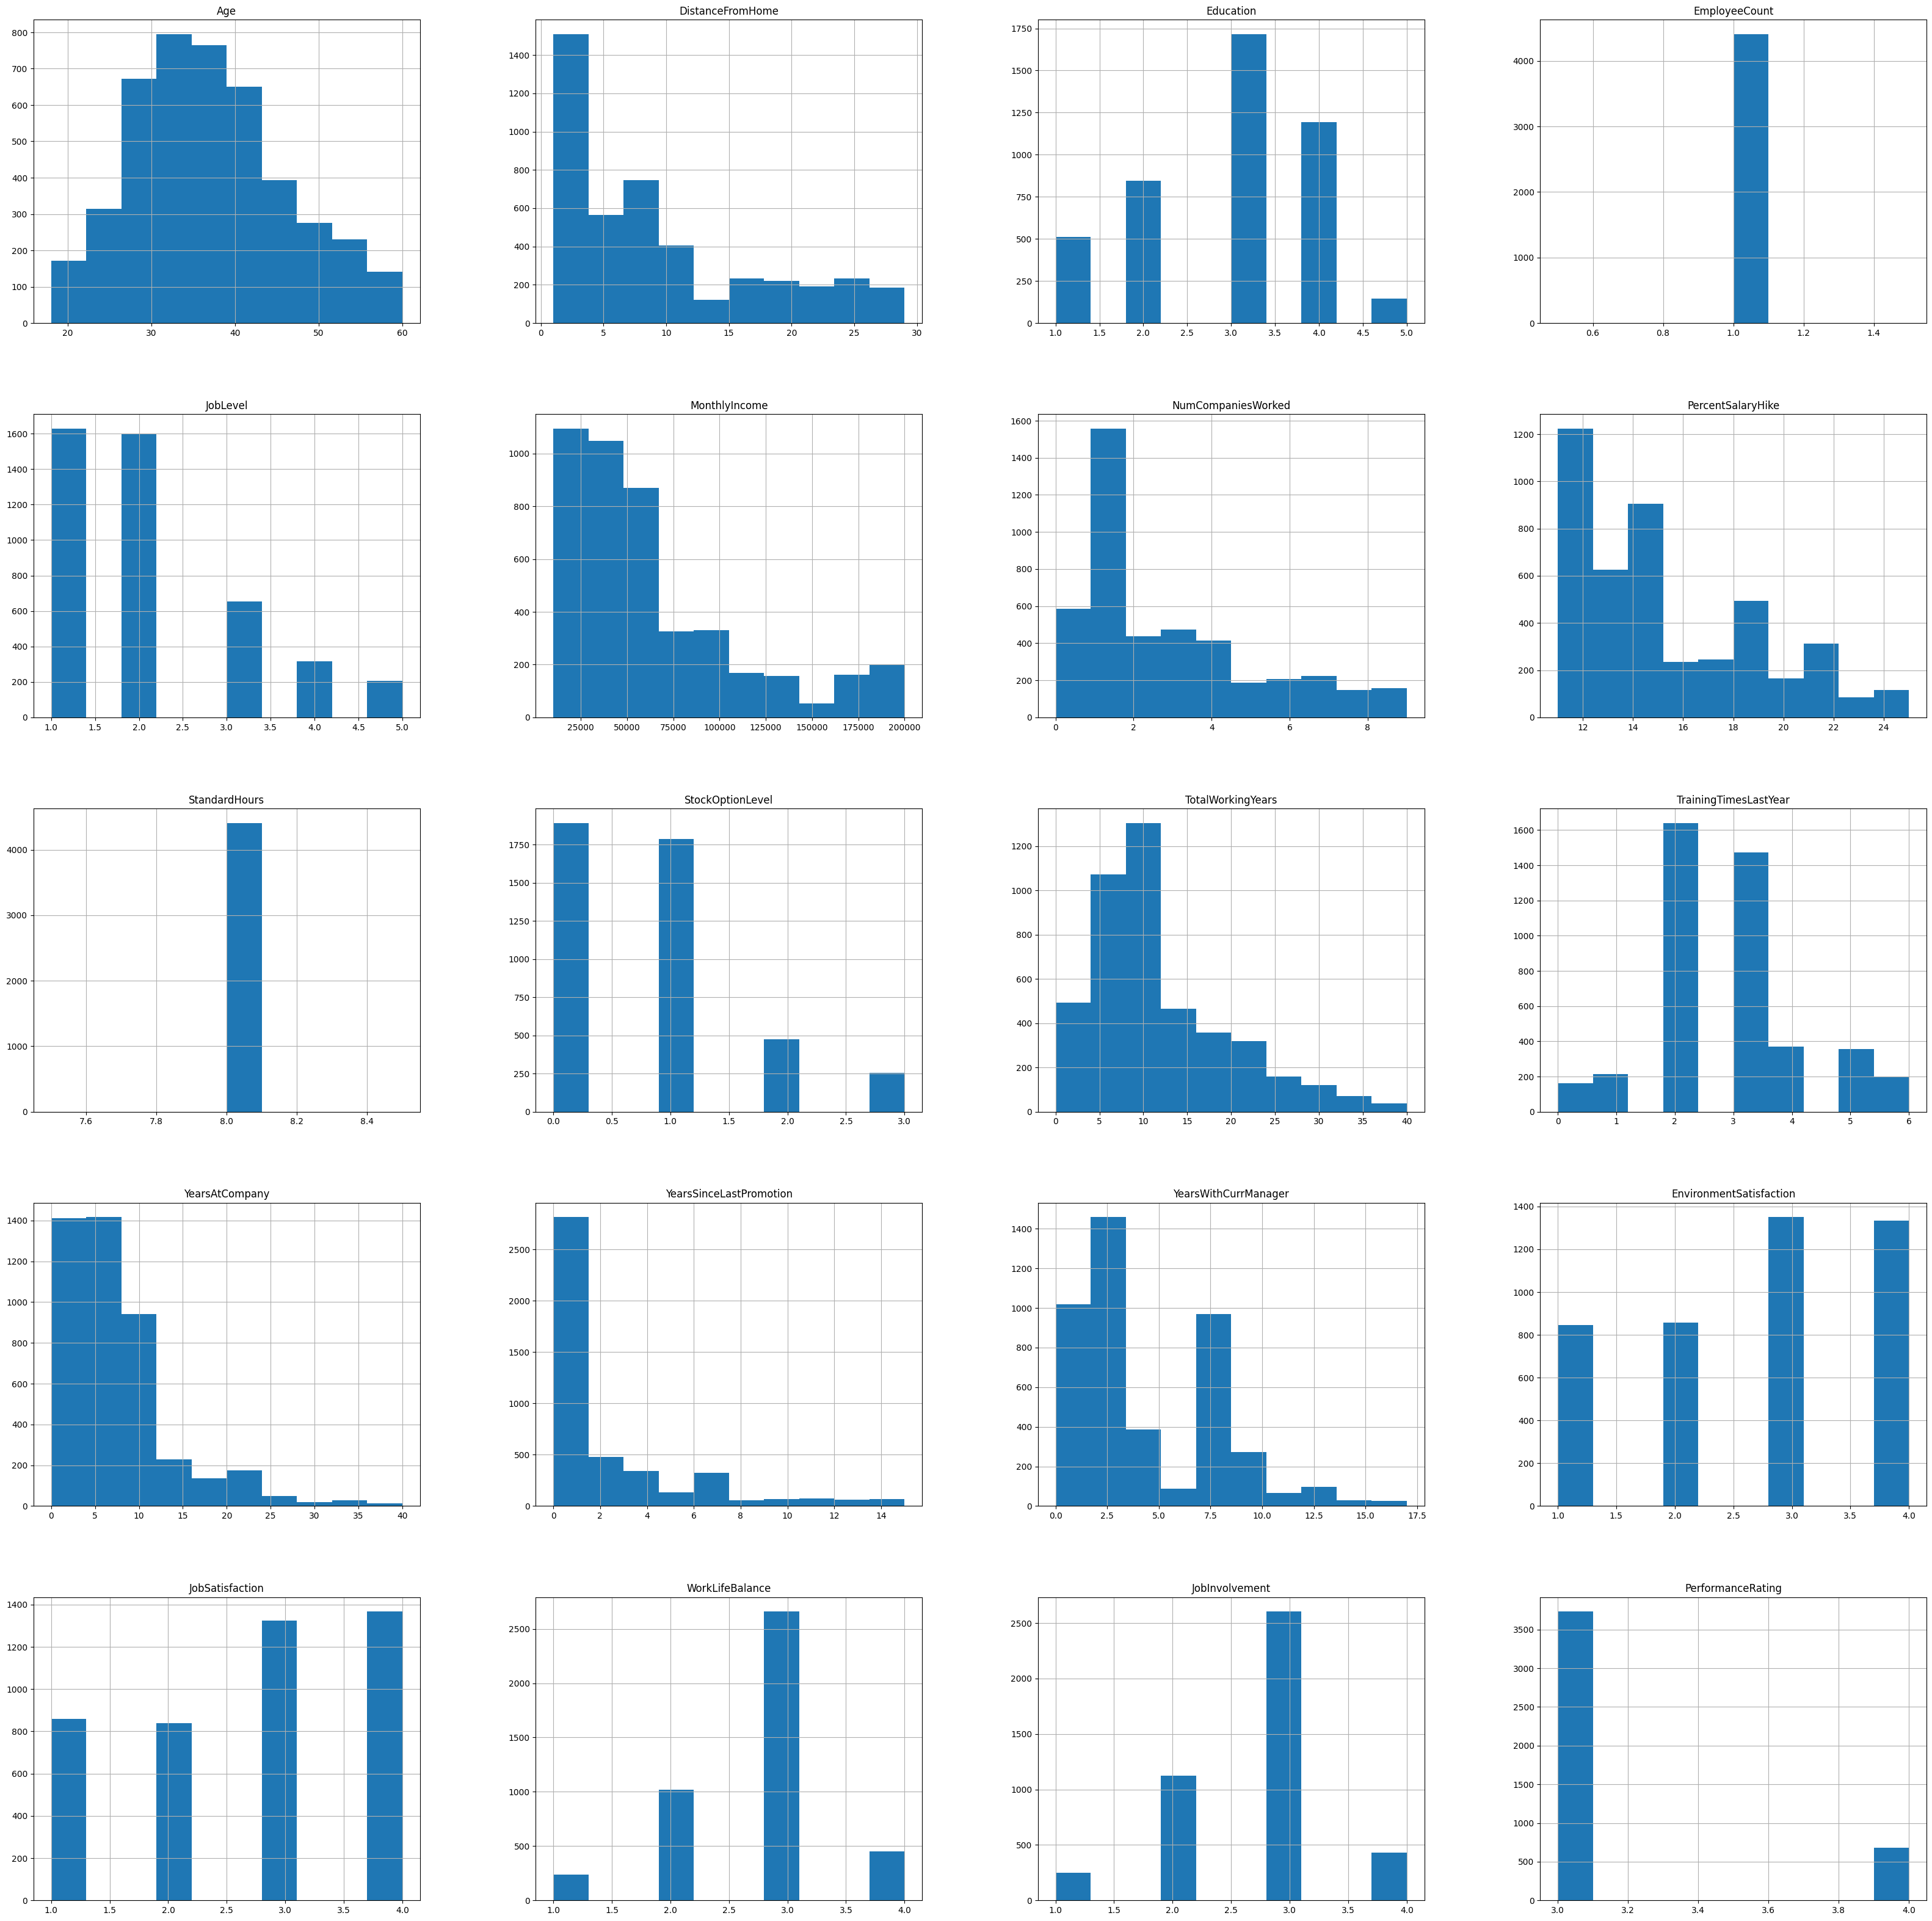

In [2]:
import utils as utl
import pandas as pd

general = utl.Load_data(utl.GENERAL_CSV)
employee_survey = utl.Load_data(utl.EMPLOYEE_SURVEY_CSV)
manager_survey = utl.Load_data(utl.MANAGER_SURVEY_CSV)

full_data = pd.merge(general, employee_survey, on='EmployeeID')
full_data = pd.merge(full_data, manager_survey, on='EmployeeID')

full_data.drop("EmployeeID", axis=1, inplace=True)

full_data.hist(figsize=(40, 40))

Ici, nous voyons donc les histogrammes des valeurs numériques qui nous sont fournies. Nous pouvons en déduire que nous n'utiliserons pas deux des colonnes, EmployeeCount et StandardHours. En effet, comme nous pouvons le voir sur les graphes, ces colonnes ne possèdent qu'une seule valeur pour tous les employés. Elles n'ont donc pas d'impact sur le fait que les employés démissionnent ou non, étant donné que tout le monde est égal.

Analysons maintenant les données non numérique qui nous sont fournies.

<Axes: title={'center': 'Attrition'}>

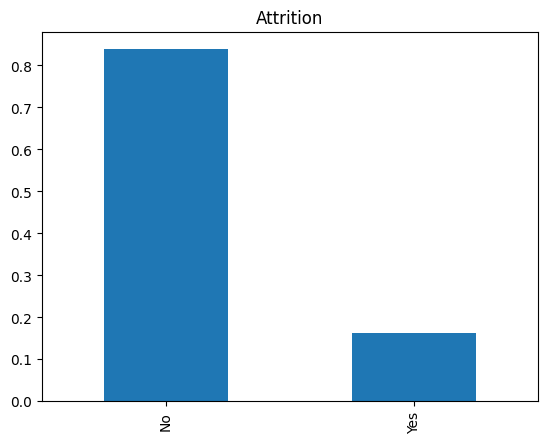

In [3]:
general.Attrition.value_counts(normalize=True).plot(kind='bar', title='Attrition')

<Axes: title={'center': 'Business Travel'}>

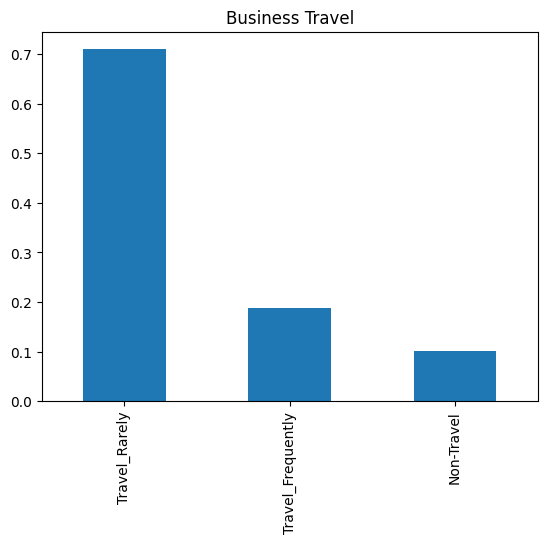

In [4]:
general.BusinessTravel.value_counts(normalize=True).plot(kind='bar', title='Business Travel')

<Axes: title={'center': 'Departement'}>

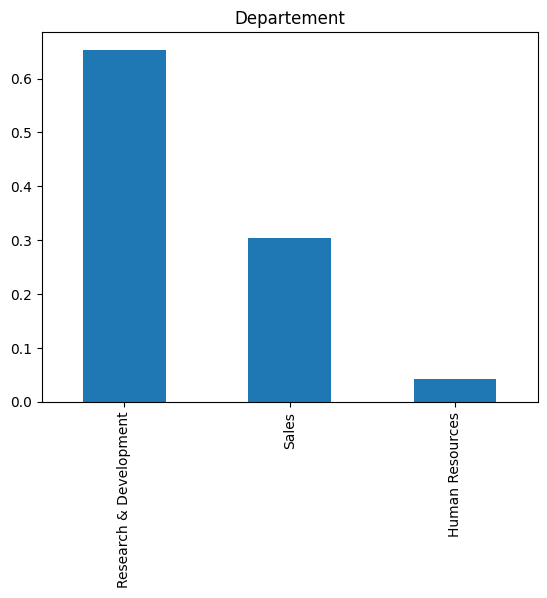

In [5]:
general.Department.value_counts(normalize=True).plot(kind='bar', title='Departement')

<Axes: title={'center': 'Education Field'}>

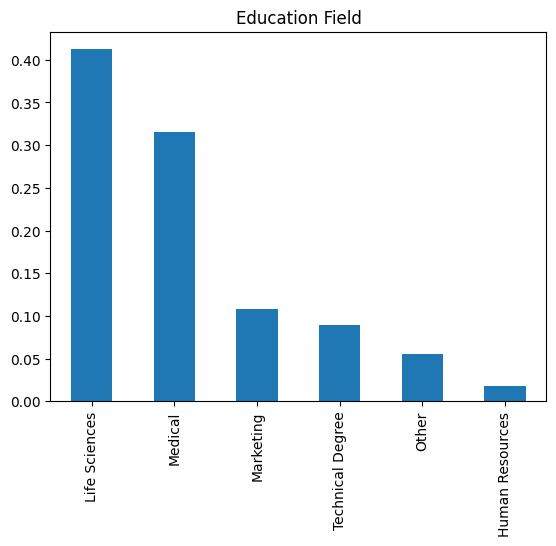

In [6]:
general.EducationField.value_counts(normalize=True).plot(kind='bar', title='Education Field')

<Axes: title={'center': 'Gender'}>

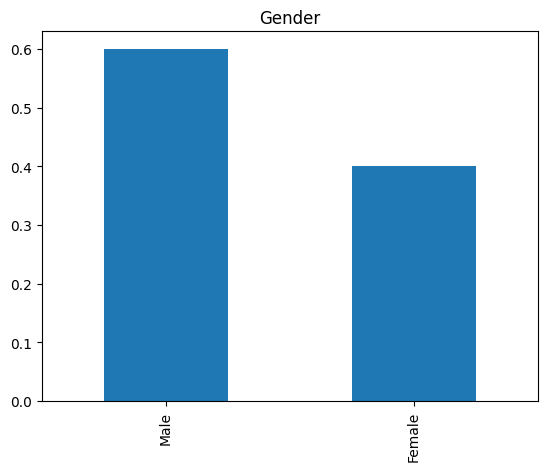

In [7]:
general.Gender.value_counts(normalize=True).plot(kind='bar', title='Gender')

<Axes: title={'center': 'Job Role'}>

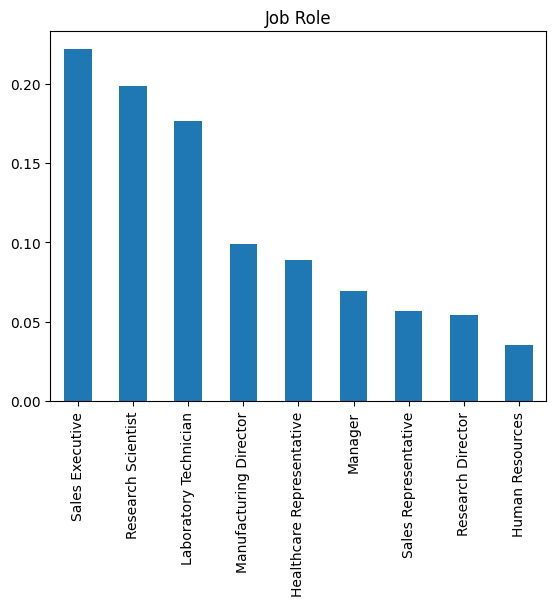

In [8]:
general.JobRole.value_counts(normalize=True).plot(kind='bar', title='Job Role')

<Axes: title={'center': 'Marital Status'}>

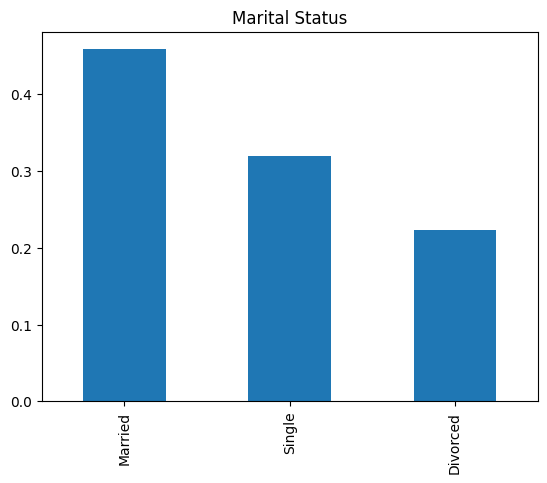

In [9]:
general.MaritalStatus.value_counts(normalize=True).plot(kind='bar', title='Marital Status')

<Axes: title={'center': 'Over 18'}>

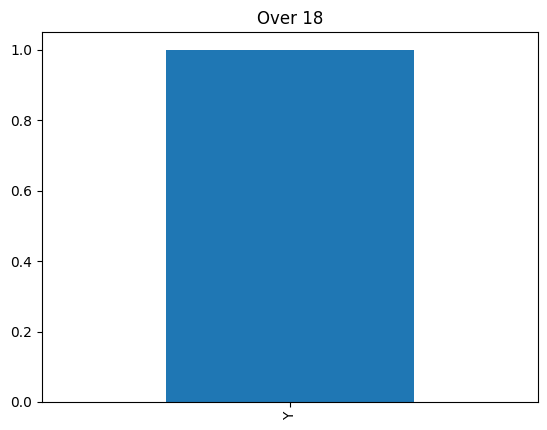

In [10]:
general.Over18.value_counts(normalize=True).plot(kind='bar', title='Over 18')

Conformément à ce qui a été dit lors de la partie éthique, nous ne prendrons pas en compte les données concernant le sexe, la distance de la maison et le statut marital de l'employé. En effet, ces données transgressent le droit à la vie privée et posent donc la question de la confidentialité des données. En outre, tout comme pour EmployeeCount et StandardHours, nous n'utiliserons pas la variable Over18, car tout le monde au sein de l'entreprise est âgé de plus de 18 ans.

Deux autres données ne seront pas exploitées par notre modèle, EmployeeID et Attrition. Nous utiliserons l'EmployeeID pour faire la jonction (merge) des données, mais elle sera ensuite supprimée car ce n'est pas une donnée ayant un impact sur la décision de départ de l'employé. Quant à l'Attrition, c'est notre variable cible, c'est-à-dire la valeur que le modèle doit prédire. Nous allons donc utiliser cette variable pour valider ou non notre modèle.

### Traitement des données

Dans cette partie nous allons voir comment nous avons décidé de traiter nos données, ainsi que la pipeline utilisé à cet effet.

Tous d'abbord nous commencont par ouvrir les fichier de données, pour "general_data", "employee_survey" et "manager_survey". Pour les ficher "in_time" et "out_time" nous allons les ouvrir dans une autre fonction qui aura pour vocation de faire la moyen du temps passé en plus ou en moins chaque jour dans l'entreprise, et ce a partir de l'heure a laquelle les employer rentre et sorte de l'entreprise.

In [11]:
general_data = pd.read_csv(utl.GENERAL_CSV)
manager_survey_data = pd.read_csv(utl.MANAGER_SURVEY_CSV)
employee_survey_data = pd.read_csv(utl.EMPLOYEE_SURVEY_CSV)
in_out_data = pl.InOutMean()

Aprés cela nous allons faire un merge de toute les tables de donnée en une seule, celon l'identifient de l'employer.

In [12]:
full_data = pd.merge(general_data, manager_survey_data, on='EmployeeID')
full_data = pd.merge(full_data, employee_survey_data, on='EmployeeID')
full_data = pd.merge(full_data, in_out_data, on='EmployeeID')
full_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,MeanHours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3,3,3.0,4.0,2.0,-2254.857759
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,2,4,3.0,2.0,4.0,-1011.711864
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,3,3,2.0,2.0,1.0,-3552.334711
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,2,3,4.0,4.0,3.0,-2902.757447
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,3,3,4.0,1.0,3.0,22.228571


Une fois les données dans une seul table, nous allons retirer des collones. Certaine vont être retirer car nous avons décider que pour des raisons étiques nous ne voulions pas les traiter, et d'autre touts simplement car elle ne possédé aucun interer.

In [13]:
USELESS_COLUMNS_TO_DROP = ['Attrition', 'EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID']
ETHICAL_COLUMNS_TO_DROP = ['Age', 'Gender', 'DistanceFromHome', 'MaritalStatus']

full_date_before_merge = full_data.copy()

full_data.drop(ETHICAL_COLUMNS_TO_DROP, axis=1, inplace=True)
full_data.drop(USELESS_COLUMNS_TO_DROP, axis=1, inplace=True)
full_data.head()

,BusinessTravel,Department,Education,EducationField,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,MeanHours
0,Travel_Rarely,Sales,2,Life Sciences,1,Healthcare Representative,131160,1.0,11,0,...,6,1,0,0,3,3,3.0,4.0,2.0,-2254.857759
1,Travel_Frequently,Research & Development,1,Life Sciences,1,Research Scientist,41890,0.0,23,1,...,3,5,1,4,2,4,3.0,2.0,4.0,-1011.711864
2,Travel_Frequently,Research & Development,4,Other,4,Sales Executive,193280,1.0,15,3,...,2,5,0,3,3,3,2.0,2.0,1.0,-3552.334711
3,Non-Travel,Research & Development,5,Life Sciences,3,Human Resources,83210,3.0,11,3,...,5,8,7,5,2,3,4.0,4.0,3.0,-2902.757447
4,Travel_Rarely,Research & Development,1,Medical,1,Sales Executive,23420,4.0,12,2,...,2,6,0,4,3,3,4.0,1.0,3.0,22.228571


C'est également à ce moment que nous allons constituer la table des résultats visé. Celle si nous sera utile plus tard lorsque nous vondrons entrainer notre model d'apprentissage. Pour celle si nous allons utilsé la colone "Attrition". Etant donnée que cette colone contient des donnée sous forme de string, nous allons les convertir en int a l'aide d'un ordinal encoder.

In [14]:
from sklearn.preprocessing import OrdinalEncoder

target_value = general_data.copy()

attris_without_attrition = list(target_value.columns.values)
attris_without_attrition.remove('Attrition')

target_value.drop(attris_without_attrition, axis=1, inplace=True)

enc = OrdinalEncoder()
target_value = enc.fit_transform(target_value)
target_value

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Finalement, nous allons traiter tout le reste de nos données. Pour ce faire nous allons utilisé une pipeline. Cette pipeline va conporter plusieur instruction. Dans un premier temps, elle commencera par remplir les valeurs manquante par les voisins les plus proche. Ensuite on effectura un redimentionnement des donnée pour ne pas que les valeurs n'est trop d'écart entre elles. Ensuite, la pipeline fera deux encodages. Un ordinal encodage pour les colones ne contenant que deux type de valeur string, et un One Hot encodage pour les colones contenant plus de deux valeurs string.

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

transform_pipeline = Pipeline([
    ('imputer', KNNImputer(n_neighbors=5)),
    ('std_scaler', StandardScaler()),
])

# Get the columns containing int
general_num = full_data.select_dtypes(include=[np.number]) 
num_attribs = list(general_num)

# Get the columns containing string
general_string = full_data.select_dtypes(include=[object])
string_attribs = list(general_string)

# Split the columns to into two set of columns (the one to hot encod, the one one to ordinal encod)
encoded_atribs = pl.Get_Columns_To_HotEncoder(full_data, string_attribs)
# print(encoded_atribs)


full_pipeline = ColumnTransformer([
    ('transform', transform_pipeline, num_attribs),
    ('ordinal', OrdinalEncoder(), encoded_atribs[1]),
    ('one_hot', OneHotEncoder(), encoded_atribs[0]),
])

# Execute the pipeline
treated_data = full_pipeline.fit_transform(full_data)
treated_data

array([[-0.89168825, -0.96148639,  1.40513592, ...,  0.        ,
         0.        ,  0.        ],
       [-1.86842575, -0.96148639, -0.491661  , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.06178675,  1.74961015,  2.72505331, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.89168825, -0.05778755, -0.5951381 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.89168825, -0.96148639, -0.87221027, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.08504925, -0.05778755, -0.21990081, ...,  0.        ,
         0.        ,  0.        ]])

Une fois toute ces étapes effectuer, les donnée sont prétes a être tester par nos modèle de donnée.

### Analyse des modèles utilisé

Dans cette partie nous allons discuter des différents model de machine learning utilsé, ainsi que comment nous couper nos données pour entrainer nos models.

Nous avons décider de tester cinq modèle different:
* SGD classifier
* Regression logistique
* Decision tree
* Random forest classifier
* MLP classifier

Pour notre prédire nos donnée, nous avons décidé de nous orienté vers des modèles de classification de donnée. Cela aider à améliorer la précision des prévisions et des estimations, en identifiant les tendances cachés dans les données. Cela pourra permettre à l'entreprises de prendre des décisions plus éclairées et de minimiser le turn-over de ses employées. 

Tout d'abbord l'entrainement de nos modèles. Pour exploiter nos modèles de donnée, nous allons devoir les entrainer. Pour cela nous allons couper notre jeux de donnée et de resultat en deux set, celui de d'entrainement, et celui de test. Nous allons definir que notre jeux d'entrainement contiendra 4000 sur les 4400 données, et je jeux que nous utiliseront pour la prédiction contiendra le reste.

In [16]:
ratio_train_test = 4000

X_train = treated_data[:ratio_train_test]
y_train = target_value[:ratio_train_test]

X_test = treated_data[ratio_train_test:]
y_test = target_value[ratio_train_test:]

#### SGD classifier

l'algorithme de descente de gradient stochastique ou SGD, pour Stochastic Gradient Descent, est une méthode d'optimisation utilisée pour entraîner des modèles de machine learning, apdapter pour les modèles à grande échelle.

L'algorithme SGD fonctionne en ajustant les poids du modèle pour minimiser la fonction de coût (ou de perte) en utilisant des gradients calculés à partir d'un échantillon de données aléatoire (ou mini-lot) plutôt que sur l'ensemble complet de données d'entraînement. Cette méthode permet une mise à jour plus rapide des poids du modèle, ce qui peut être important pour les ensembles de données volumineux ou pour les modèles qui nécessitent de nombreuses itérations pour converger vers une solution optimale.

In [17]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(max_iter=5)

sgdc.fit(X_train, y_train)
predict_data = sgdc.predict(X_test)

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Une fois le modèle entrainer et les donnée prédite, nous allons pouvoir faire la coparaison entre les donnée prédite et les vrai donnés. 

La première métrique que nous allons calculer est le score de cross validation. Il s'agit d'une métrique de mesure de performance importante pour évaluer la capacité d'un modèle de machine learning à généraliser correctement aux données inconnues, en utilisant la validation croisée pour estimer la performance du modèle sur des données de test.

In [18]:
from sklearn.model_selection import cross_val_score

cross_score = cross_val_score(sgdc, X_train, y_train, cv=3, scoring="accuracy")
cross_score

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn

array([0.79985007, 0.81545386, 0.73818455])

Ensuite nous allons calculer la matrice de confusion de nos resultats. Celle si nous permettra de déterminer le rappelle, la précision et le f1 score de notre model.

In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Confusion matrix
matrix = confusion_matrix(y_test, predict_data)
print("Confusion matrix:")
print(matrix)
print()

# Recall
recall = recall_score(y_test, predict_data)
print("Recall:")
print(recall)
print()

# Accuracy
precision = precision_score(y_test, predict_data)
print("Precision:")
print(precision)
print()

# f1 score
f1 = f1_score(y_test, predict_data)
print("F1 score:")
print(f1)
print()

Confusion matrix:
[[328  22]
 [ 50  10]]

Recall:
0.16666666666666666

Precision:
0.3125

F1 score:
0.21739130434782608



#### Regression logistique

La régression logistique est une méthode d'apprentissage automatique supervisé utilisé pour prédire la probabilité d'un événement en se basant sur un ensemble de variables explicatives.

Il est principalement utilisé dans les cas où la variable cible est binaire, ce qui est adapter a notre situation.

In [20]:
from sklearn.linear_model import LogisticRegression

logic_reg = LogisticRegression()

logic_reg.fit(X_train, y_train)
predict_data = logic_reg.predict(X_test)

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Une fois le modèle entrainer et les donnée prédite, nous allons pouvoir faire la coparaison entre les donnée prédite et les vrai donnés.

La première métrique que nous allons calculer est le score de cross validation. Il s'agit d'une métrique de mesure de performance importante pour évaluer la capacité d'un modèle de machine learning à généraliser correctement aux données inconnues, en utilisant la validation croisée pour estimer la performance du modèle sur des données de test.

In [21]:
cross_score = cross_val_score(logic_reg, X_train, y_train, cv=3, scoring="accuracy")
cross_score

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.85757121, 0.85971493, 0.85221305])

Ensuite nous allons calculer la matrice de confusion de nos resultats. Celle si nous permettra de déterminer le rappelle, la précision et le f1 score de notre model.

In [22]:
# Confusion matrix
matrix = confusion_matrix(y_test, predict_data)
print("Confusion matrix:")
print(matrix)
print()

# Recall
recall = recall_score(y_test, predict_data)
print("Recall:")
print(recall)
print()

# Accuracy
precision = precision_score(y_test, predict_data)
print("Precision:")
print(precision)
print()

# f1 score
f1 = f1_score(y_test, predict_data)
print("F1 score:")
print(f1)
print()

Confusion matrix:
[[340  10]
 [ 47  13]]

Recall:
0.21666666666666667

Precision:
0.5652173913043478

F1 score:
0.3132530120481928



#### Decision tree classifier

L'arbre de décision est un modèle d'apprentissage automatique supervisé qui utilise une série de décisions logiques pour résoudre des problèmes de classification ou de régression.

Il est construit à partir d'un ensemble d'exemples d'entraînement contenant des variables explicatives et une variable cible qui peut prendre plusieurs valeurs. L'arbre de décision partitionne l'ensemble d'exemples d'entraînement en fonction des valeurs de certaines variables explicatives et crée des noeuds pour représenter ces partitions. Ces noeuds sont reliés entre eux par des branches qui représentent les décisions logiques qui conduisent à la variable cible.

In [23]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)
predict_data = tree.predict(X_test)

Une fois le modèle entrainer et les donnée prédite, nous allons pouvoir faire la coparaison entre les donnée prédite et les vrai donnés.

La première métrique que nous allons calculer est le score de cross validation. Il s'agit d'une métrique de mesure de performance importante pour évaluer la capacité d'un modèle de machine learning à généraliser correctement aux données inconnues, en utilisant la validation croisée pour estimer la performance du modèle sur des données de test.

In [24]:
cross_score = cross_val_score(tree, X_train, y_train, cv=3, scoring="accuracy")
cross_score

array([0.98650675, 0.99474869, 0.98724681])

Ensuite nous allons calculer la matrice de confusion de nos resultats. Celle si nous permettra de déterminer le rappelle, la précision et le f1 score de notre model.

In [25]:
# Confusion matrix
matrix = confusion_matrix(y_test, predict_data)
print("Confusion matrix:")
print(matrix)
print()

# Recall
recall = recall_score(y_test, predict_data)
print("Recall:")
print(recall)
print()

# Accuracy
precision = precision_score(y_test, predict_data)
print("Precision:")
print(precision)
print()

# f1 score
f1 = f1_score(y_test, predict_data)
print("F1 score:")
print(f1)
print()

Confusion matrix:
[[348   2]
 [  0  60]]

Recall:
1.0

Precision:
0.967741935483871

F1 score:
0.9836065573770492



#### Random forest classifier

l'algorithme de forêt aléatoire est une méthode d'apprentissage automatique supervisé utilisée pour résoudre des problèmes de classification, de régression et de détection d'anomalies.

Il combine plusieurs arbres de décision indépendants, construits à partir d'un sous-ensemble aléatoire de variables explicatives et d'un sous-ensemble aléatoire d'exemples d'entraînement.

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10)

forest.fit(X_train, y_train)
predict_data = forest.predict(X_test)

/var/folders/tq/bqrv7srs1dzf04sb7mnhdm4h0000gn/T/ipykernel_15602/4000635993.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


Une fois le modèle entrainer et les donnée prédite, nous allons pouvoir faire la coparaison entre les donnée prédite et les vrai donnés.

La première métrique que nous allons calculer est le score de cross validation. Il s'agit d'une métrique de mesure de performance importante pour évaluer la capacité d'un modèle de machine learning à généraliser correctement aux données inconnues, en utilisant la validation croisée pour estimer la performance du modèle sur des données de test.

In [27]:
cross_score = cross_val_score(tree, X_train, y_train, cv=3, scoring="accuracy")
cross_score

array([0.98725637, 0.99549887, 0.99024756])

Ensuite nous allons calculer la matrice de confusion de nos resultats. Celle si nous permettra de déterminer le rappelle, la précision et le f1 score de notre model.

In [28]:
# Confusion matrix
matrix = confusion_matrix(y_test, predict_data)
print("Confusion matrix:")
print(matrix)
print()

# Recall
recall = recall_score(y_test, predict_data)
print("Recall:")
print(recall)
print()

# Accuracy
precision = precision_score(y_test, predict_data)
print("Precision:")
print(precision)
print()

# f1 score
f1 = f1_score(y_test, predict_data)
print("F1 score:")
print(f1)
print()

Confusion matrix:
[[350   0]
 [  0  60]]

Recall:
1.0

Precision:
1.0

F1 score:
1.0



#### MLP classifier

Le MLD ou Machine Learning Dépendant des Données" est une méthodes qui utilisent les caractéristiques statistiques des données d'entrée pour ajuster leur modèle. Contrairement aux algorithmes d'apprentissage automatique indépendants des données, les algorithmes MLD dépendent des caractéristiques des données d'entraînement pour ajuster le modèle.

Les algorithmes MLD sont souvent utilisés en apprentissage automatique car ils peuvent fournir des modèles plus précis et plus adaptés aux données d'entraînement. Cependant, ils peuvent également être plus sensibles aux erreurs et aux biais présents dans les données d'entraînement, ce qui peut entraîner une baisse des performances de prédiction sur des données de test ou de nouveaux ensembles de données.

In [29]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(max_iter=5)

mlp.fit(X_train, y_train)
predict_data = mlp.predict(X_test)

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1096: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Une fois le modèle entrainer et les donnée prédite, nous allons pouvoir faire la coparaison entre les donnée prédite et les vrai donnés.

La première métrique que nous allons calculer est le score de cross validation. Il s'agit d'une métrique de mesure de performance importante pour évaluer la capacité d'un modèle de machine learning à généraliser correctement aux données inconnues, en utilisant la validation croisée pour estimer la performance du modèle sur des données de test.

In [30]:
cross_score = cross_val_score(tree, X_train, y_train, cv=3, scoring="accuracy")
cross_score

array([0.98875562, 0.99549887, 0.99249812])

Ensuite nous allons calculer la matrice de confusion de nos resultats. Celle si nous permettra de déterminer le rappelle, la précision et le f1 score de notre model.

In [31]:
# Confusion matrix
matrix = confusion_matrix(y_test, predict_data)
print("Confusion matrix:")
print(matrix)
print()

# Recall
recall = recall_score(y_test, predict_data)
print("Recall:")
print(recall)
print()

# Accuracy
precision = precision_score(y_test, predict_data)
print("Precision:")
print(precision)
print()

# f1 score
f1 = f1_score(y_test, predict_data)
print("F1 score:")
print(f1)
print()

Confusion matrix:
[[348   2]
 [ 57   3]]

Recall:
0.05

Precision:
0.6

F1 score:
0.0923076923076923



### Analyse des resultats

Dans cette parti nous allons donc faire une analyse des résultats obtenue pour chacun des modèles que nous avons tester, ainsi qu'un analyse des métric utisé.

Tout d'abbord nous pouvons parlé du coéfficient de correlation. Cette métric peut être utilsé pour déterminer si il peut y avoir des corélation entre les différents parrametre, et dans notre situation pour déterminer qu'elle peuvent être les parramètres ayant le plus d'impact sur le turn-over dans l'entreprise.

In [32]:
pl.Cord_data(full_date_before_merge)

Correlation:
Attrition                  1.000000
MeanHours                  0.190905
MaritalStatus              0.162070
NumCompaniesWorked         0.042345
PercentSalaryHike          0.032533
JobRole                    0.025809
PerformanceRating          0.023403
Gender                     0.018125
BusinessTravel             0.000074
EmployeeID                -0.004729
StockOptionLevel          -0.006839
DistanceFromHome          -0.009730
JobLevel                  -0.010290
Education                 -0.015111
JobInvolvement            -0.015588
MonthlyIncome             -0.024910
YearsSinceLastPromotion   -0.033019
Department                -0.048206
TrainingTimesLastYear     -0.049431
EducationField            -0.057940
WorkLifeBalance           -0.062756
EnvironmentSatisfaction   -0.102142
JobSatisfaction           -0.102847
YearsAtCompany            -0.136932
YearsWithCurrManager      -0.156199
Age                       -0.159205
TotalWorkingYears         -0.170847
EmployeeCount  

On peut voir que les resultats de correlation ne son pas trés interessant. Aucunne variable ne semble avoir plus d'impact sur le turn over.

Nous allons tester de voir si l'on peut observer des resultats plus concluant à l'aide de courbe de roc. Celle si vont nous permettre d'évaluer la perfomance de nos different model tester.

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/atarte/Documents/cesi/4eme_annee/projet/IA/artificial_intelligence/model.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using 

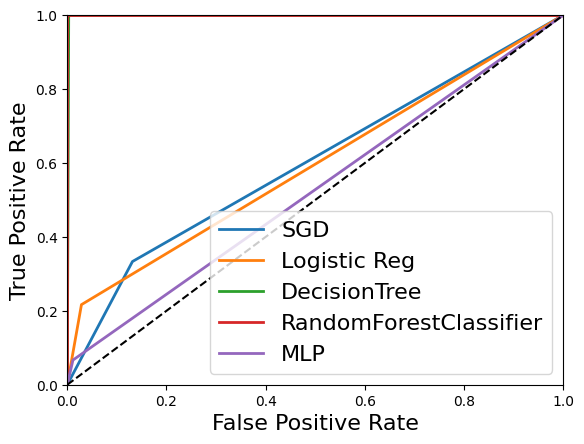

In [34]:
import model as mdl
import matplotlib.pyplot as plt

models_name = ['SGD', 'Logistic Reg', 'DecisionTree', 'RandomForestClassifier', 'MLP']
models_list = [SGDClassifier(max_iter=5), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=10), MLPClassifier(max_iter=5)]

roc_array = []

for i in range(len(models_list)):
    roc_data = mdl.Test_model(models_list[i], treated_data, target_value)

    roc_array.append(roc_data)
    
len_roc = len(roc_array)

for i in range(len_roc-1):
    plt.plot(roc_array[i][0], roc_array[i][1], linewidth=2, label=models_name[i])

mdl.plot_roc_curve(roc_array[len_roc-1][0], roc_array[len_roc-1][1], models_name[len_roc-1])
plt.legend(loc="lower right", fontsize=16)
plt.show()

On peut remarqué que seul les courbes de l'abre de decision et de la foret aléatoire sont bonne, voir trop bonne. Leur resultat resemble plus a une cas d'over-fitting. C'est deux modèles sont beaucoup trop puissant pour notre petit jeu de donnée. Malheuresement les trois autre modèle en comparaison nous fournisse des résultat plutot médiocre. Aussi bien dans leur cross validation score, moyennant les 80% pour tout, ainsi que leur f1 entre 1% et 30%. On peut bien voir que les resultat de nos modèles de donnée sont loin d'être concluant.

Malheuresement nous pouvons voir que les resultats fournir par tout nos modèles. Même en executant les modèles plusieur fois pour essayer d'obtenir de meilleur chance et tombé sur des meilleur resultat, les améliorations ne ce font que trés minime. Si tous nos modèles son problèmatique, alors c'est que la cause du problème ce trouve ailleur. Nous avons donc suposé que le problème viens des données en elle même, en effet il y a deux possible cause a cela. Soit notre jeux de donnée et trop petit et n'est donc pas assé représentatif, et en effet 4000 données nous semble vraiment être un petit jeu de donnée. L'autre problème viens peut-etre du fait que les données sont pas représentative d'une situation réelle et ton était généré au hasard, comme le laisse a sugéré l'énoncer de notre projet.